In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# -----------------------------
# Step 1: Load the Dataset
# -----------------------------
# If you have a CSV, use: df = pd.read_csv('your_file.csv')
# For demonstration, let's create a synthetic dataset

np.random.seed(42)
n_samples = 200

df = pd.DataFrame({
    'Rainfall': np.random.uniform(50, 300, n_samples),   # mm
    'Temperature': np.random.uniform(15, 35, n_samples), # °C
    'Soil_Type': np.random.choice([0,1,2], n_samples),   # 0=Sandy,1=Loamy,2=Clay
    'Fertilizer_Use': np.random.uniform(50, 200, n_samples), # kg/ha
    'Crop_Yield': np.random.uniform(2, 8, n_samples)     # tons/ha
})

print(df.head())

     Rainfall  Temperature  Soil_Type  Fertilizer_Use  Crop_Yield
0  143.635030    27.840633          0      199.957651    6.887448
1  287.678577    16.682799          1      199.495526    5.991183
2  232.998485    18.232574          0      133.314756    5.138393
3  199.664621    32.971084          0      165.348112    4.152983
4   89.004660    27.128581          1      191.714859    7.263203


         Rainfall  Temperature   Soil_Type  Fertilizer_Use  Crop_Yield
count  200.000000   200.000000  200.000000      200.000000  200.000000
mean   171.001558    25.087503    0.875000      119.364028    4.924743
std     73.722858     5.860024    0.838385       42.573386    1.693956
min     51.380529    15.101232    0.000000       52.181700    2.027792
25%    107.145604    20.229250    0.000000       79.893912    3.420142
50%    173.621563    25.832798    1.000000      117.346738    4.804240
75%    239.214904    29.843986    2.000000      151.955363    6.354868
max    296.721734    34.810103    2.000000      199.957651    7.981246


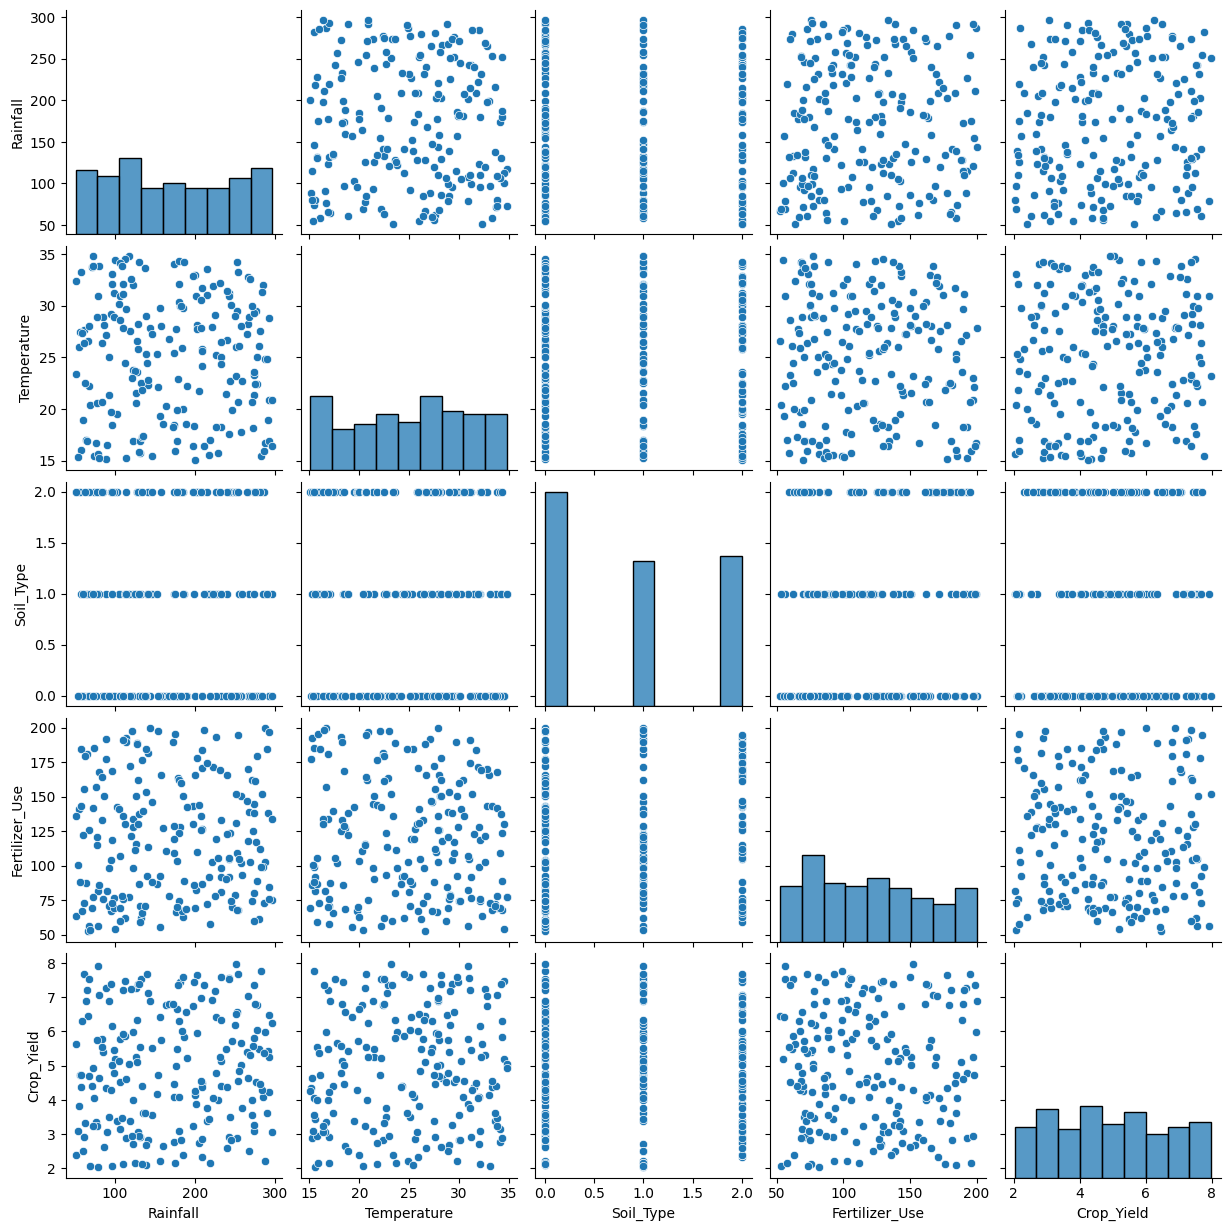

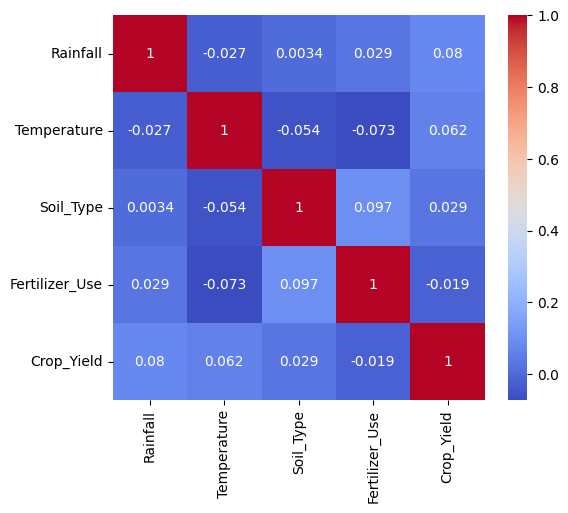

In [ ]:
# -----------------------------
# Step 2: Exploratory Data Analysis (EDA)
# -----------------------------
print(df.describe())
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# -----------------------------
# Step 3: Preprocessing
# -----------------------------
# Features and target
X = df.drop('Crop_Yield', axis=1)
y = df['Crop_Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale features (for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# -----------------------------
# Step 4: Model 1 - Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.3f}")
print(f"Linear Regression R^2: {r2_lr:.3f}")

Linear Regression RMSE: 1.759
Linear Regression R^2: -0.030


In [ ]:
# -----------------------------
# Step 5: Model 2 - Random Forest Regression
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest R^2: {r2_rf:.3f}")

Random Forest RMSE: 1.813
Random Forest R^2: -0.094


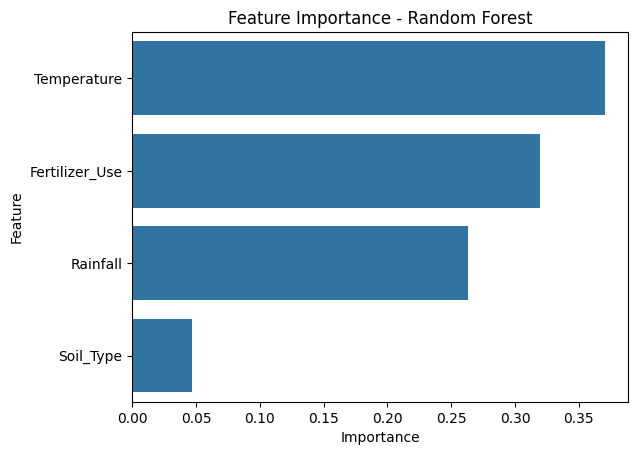

In [ ]:
# -----------------------------
# Step 6: Feature Importance (Random Forest)
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()

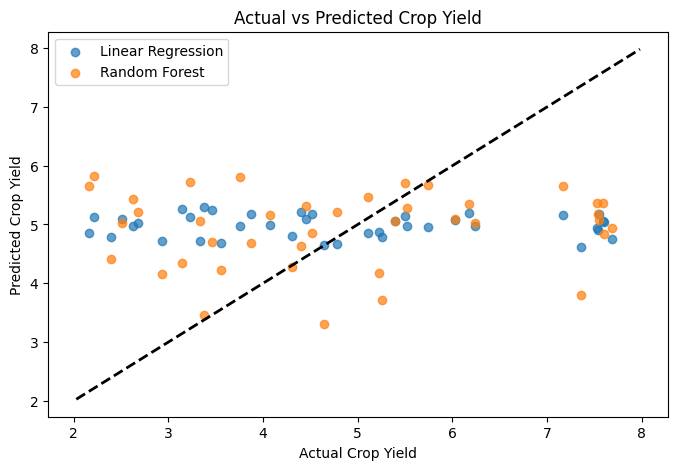

In [ ]:
# -----------------------------
# Step 7: Visualize Predictions
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.legend()
plt.show()